
Importar librerias

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

Configurar estilo

In [31]:
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  8)

EDA del dataset de tecnologias

In [32]:
tecnologia=pd.read_csv('Dataset/Internet_Accesos_Tecnologia.csv')
tecnologia.drop(columns='Unnamed: 0', inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/Internet_Accesos_Tecnologia.csv'

In [ ]:
tecnologia.head(3)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,1395277,6031970,2871541,55711,23523,11091128
1,2022,2,1468333,5979214,2723285,556243,231609,10958684
2,2022,1,1533240,6073426,2219533,545814,251996,10624009


In [ ]:
tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   year_trim     35 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


In [ ]:
# Creamos el "year_trim" para poder ordenar correctamente las fechas en el eje X
tecnologia['year_trim'] = tecnologia.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

<Axes: xlabel='year_trim', ylabel='Otros'>

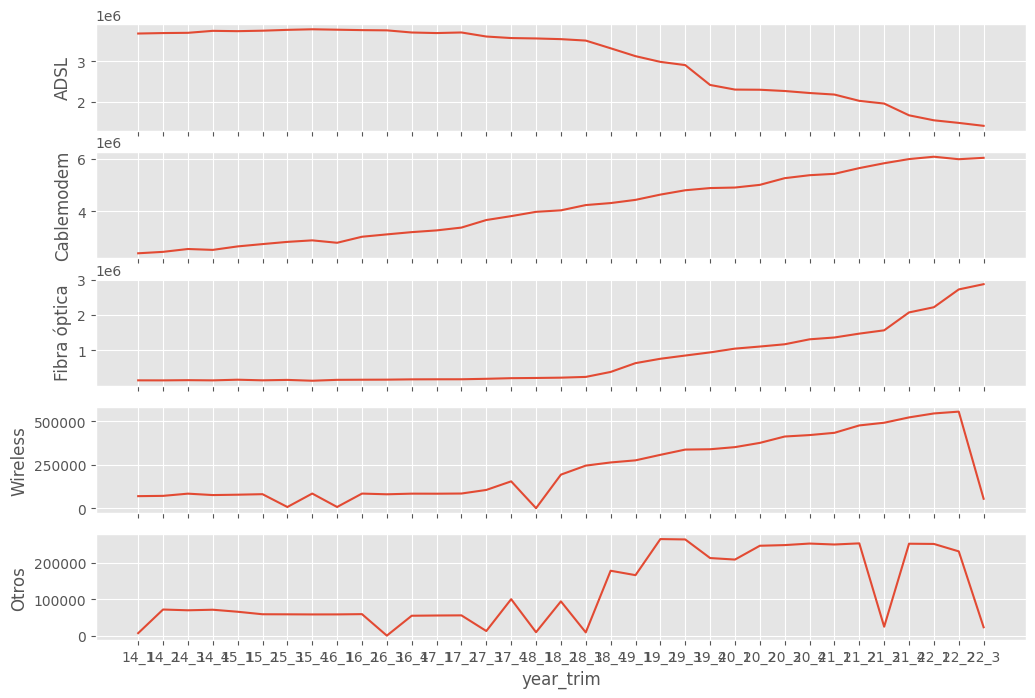

In [ ]:
fig, axs = plt.subplots(5, sharex=True)

sns.lineplot(data=tecnologia.sort_values(by=['Año','Trimestre']), x='year_trim', y='ADSL', ax=axs[0])
sns.lineplot(data=tecnologia.sort_values(by=['Año','Trimestre']), x='year_trim', y='Cablemodem', ax=axs[1])
sns.lineplot(data=tecnologia.sort_values(by=['Año','Trimestre']), x='year_trim', y='Fibra óptica', ax=axs[2])
sns.lineplot(data=tecnologia.sort_values(by=['Año','Trimestre']), x='year_trim', y='Wireless', ax=axs[3])
sns.lineplot(data=tecnologia.sort_values(by=['Año','Trimestre']), x='year_trim', y='Otros', ax=axs[4])

Conclusion: Cablemodem y Fibra Optica son mas demandadas actualmente

EDA del dataset de accesos

In [ ]:
acceso = pd.read_csv("Dataset/Internet_Penetracion.csv")
acceso.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
acceso.head(3)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022


In [ ]:
acceso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
# Creamos el "year_trim" para poder ordenar correctamente las fechas en el eje X
acceso['year_trim'] = acceso.apply(lambda x: f'{x.Año - 2000}_{x.Trimestre}', axis=1)

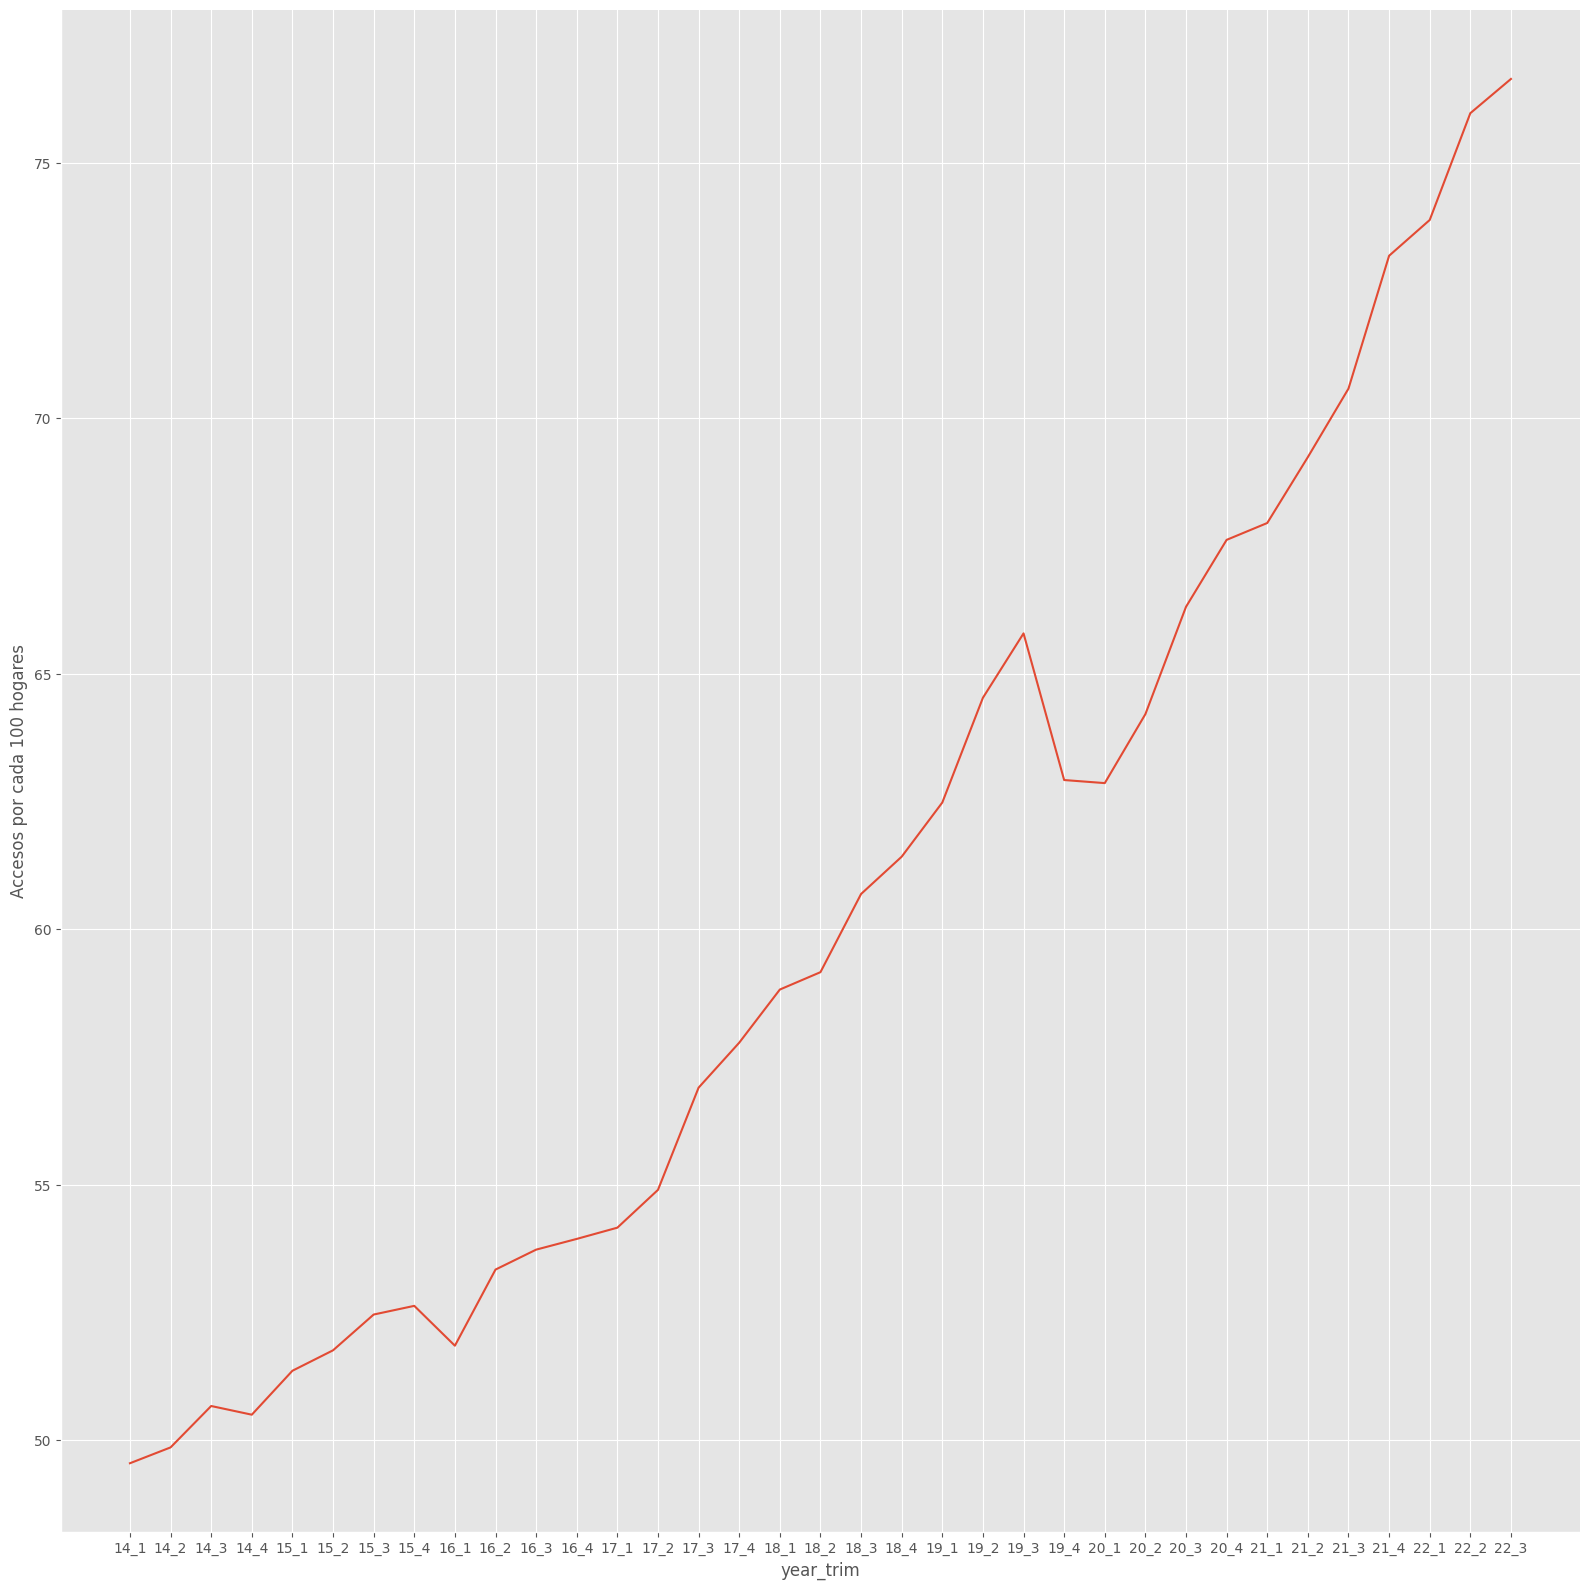

In [ ]:
sns.relplot(data=acceso.sort_values(by=['Año', 'Trimestre']), x= 'year_trim', y='Accesos por cada 100 hogares', height=16, kind='line')

Conclusion: El incremento de accesos a lo largo de los años demuestra que el internet se convirtio en una necesidad para las personas

EDA del dataset de conexiones por rango de velocidad


In [ ]:
conexiones = pd.read_csv("Dataset/acceso_int_vel.csv")


In [ ]:
conexiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         3098 non-null   object 
 1   Hasta 30 mbps     3098 non-null   float64
 2   de_30_a_50_mbps   3098 non-null   float64
 3   de_50_a_80_mbps   3098 non-null   float64
 4   de_80_a_100_mbps  3098 non-null   float64
dtypes: float64(4), object(1)
memory usage: 121.1+ KB


In [ ]:
conexiones.drop(columns=['Unnamed: 0', 'Partido', 'Localidad'], inplace=True)

In [ ]:
conexiones.head(3)

,Provincia,Hasta 30 mbps,de_30_a_50_mbps,de_50_a_80_mbps,de_80_a_100_mbps
0,Buenos aires,2101.134,37.0,9.0,0.0
1,Buenos aires,58.000,0.0,0.0,0.0
2,Buenos aires,192.000,0.0,0.0,0.0


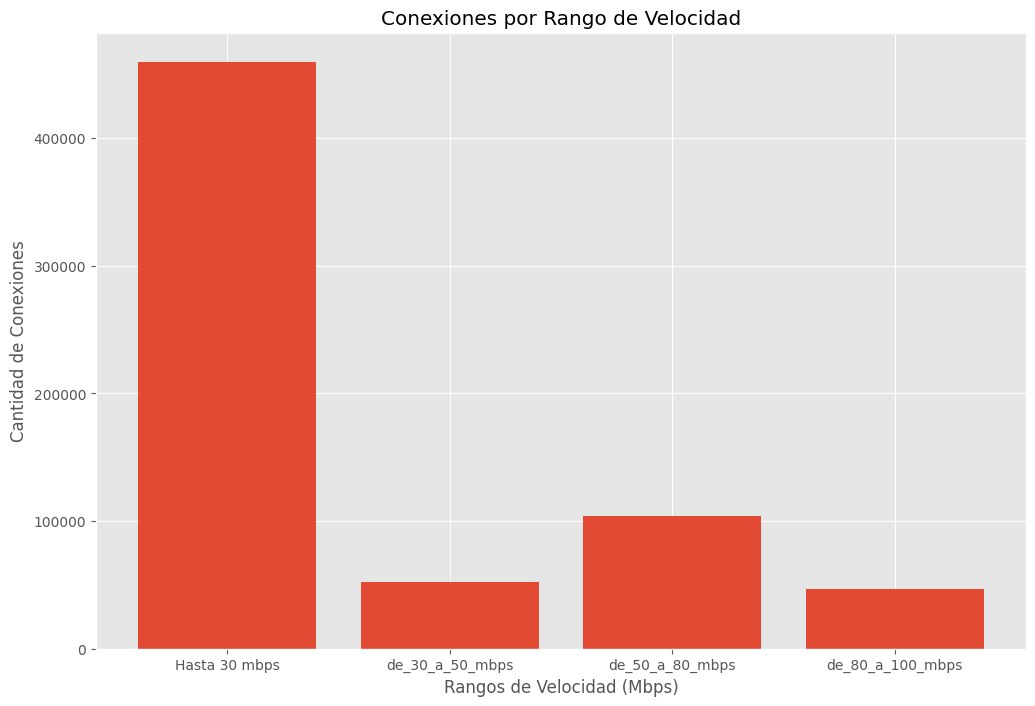

In [ ]:
# Agrupar por provincia y sumar los valores
df_agrupado = conexiones.groupby('Provincia').sum()

# Obtener nombres de columnas y valores
columnas = df_agrupado.columns
valores = df_agrupado.values[0]

# Crear gráfico de barras
fig, ax = plt.subplots()
ax.bar(columnas, valores)

# Etiquetas de los ejes y título del gráfico
ax.set_xlabel('Rangos de Velocidad (Mbps)')
ax.set_ylabel('Cantidad de Conexiones')
ax.set_title('Conexiones por Rango de Velocidad')

# Mostrar el gráfico
plt.show()

Conclusion: Las velocidades por encima de los 30mbps tienen pocas conexiones por falta de tecnologias de provisionamiento y son las mas demandadas,
ya que se recomienda usar por encima de los 50mbps de velocidad para estudiar o trabajar online

EDA para el dataset de historico de velocidades

In [34]:
velocidad = pd.read_csv('Dataset/historico_vel_internet.csv')

In [35]:
velocidad.head(3)

,Unnamed: 0,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,0,2022,3,62.46,Jul-Sept 2022
1,1,2022,2,58.44,Abr-Jun 2022
2,2,2022,1,55.11,Ene-Mar 2022


In [42]:
velocidad.drop(columns='Unnamed: 0', inplace= True)

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,year_trim
0,2022,3,62.46,Jul-Sept 2022,22_3
1,2022,2,58.44,Abr-Jun 2022,22_2
2,2022,1,55.11,Ene-Mar 2022,22_1
3,2021,4,52.34,Oct-Dic 2021,21_4
4,2021,3,48.46,Jul-Sept 2021,21_3
5,2021,2,45.63,Abr-Jun 2021,21_2
6,2021,1,43.11,Ene-Mar 2021,21_1
7,2020,4,42.36,Oct-Dic 2020,20_4
8,2020,3,40.67,Jul-Sept 2020,20_3
9,2020,2,38.32,Abr-Jun 2020,20_2


In [36]:
velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              35 non-null     int64  
 1   Año                     35 non-null     int64  
 2   Trimestre               35 non-null     int64  
 3   Mbps (Media de bajada)  35 non-null     float64
 4   Trimestre.1             35 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


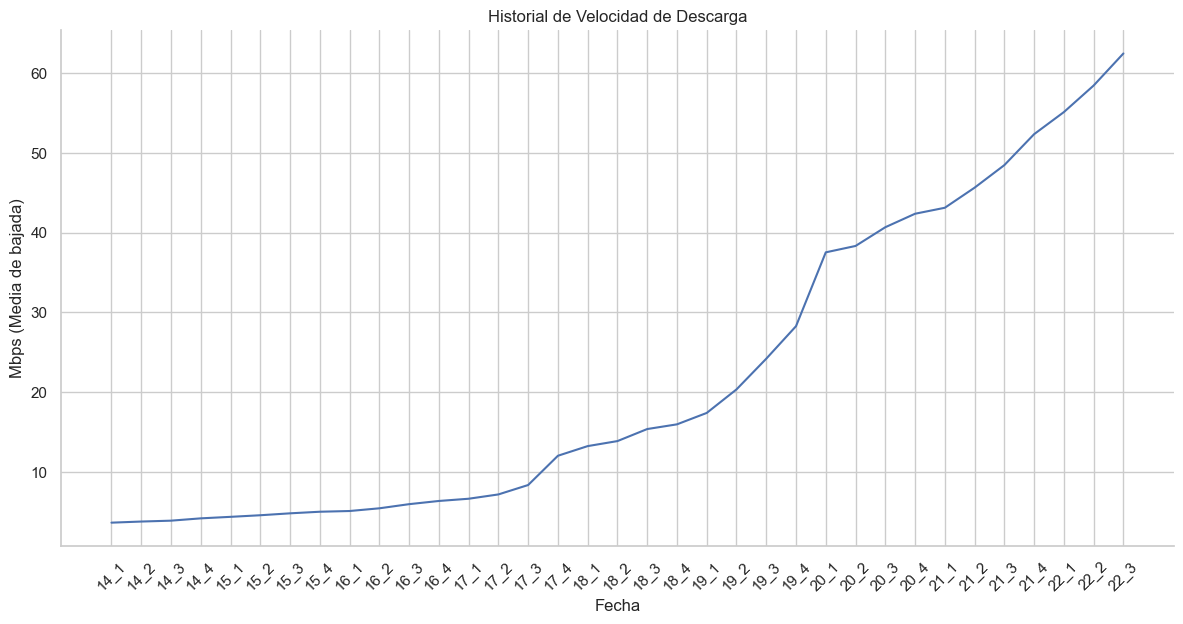

In [47]:
# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear el gráfico utilizando relplot
g = sns.relplot(data=velocidad, x='year_trim', y='Mbps (Media de bajada)', kind='line', height=6, aspect=2)

# Personalizar los ejes y el título
g.set(xlabel='Fecha', ylabel='Mbps (Media de bajada)', title='Historial de Velocidad de Descarga')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Revertir el orden de los valores en el eje x
plt.gca().invert_xaxis()

# Mostrar el gráfico
plt.show()


Conclusion: La velocidad media de bajada incrementa a lo largo del tiempo directamente proporcional con la evolucion de la tecnologia y el tamaño 
de los archivos